In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
ipl_df = pd.read_csv('ipl/matches.csv')

In [3]:
ipl_df.columns

Index([u'id', u'season', u'city', u'date', u'team1', u'team2', u'toss_winner',
       u'toss_decision', u'result', u'dl_applied', u'winner', u'win_by_runs',
       u'win_by_wickets', u'player_of_match', u'venue', u'umpire1', u'umpire2',
       u'umpire3'],
      dtype='object')

In [4]:
ipl_df.dtypes

id                   int64
season               int64
city                object
date                object
team1               object
team2               object
toss_winner         object
toss_decision       object
result              object
dl_applied           int64
winner              object
win_by_runs          int64
win_by_wickets       int64
player_of_match     object
venue               object
umpire1             object
umpire2             object
umpire3            float64
dtype: object

In [5]:
ipl_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
ipl_df.shape

(636, 18)

In [7]:
ipl_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [8]:
ipl_df.drop(['umpire3'],axis=1,inplace=True)

In [9]:
ipl_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [10]:
ipl_df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan],
      dtype=object)

In [11]:
winning_count = ipl_df.groupby('winner')['id'].nunique()
print(winning_count)
print(type(winning_count))

winner
Chennai Super Kings            79
Deccan Chargers                29
Delhi Daredevils               62
Gujarat Lions                  13
Kings XI Punjab                70
Kochi Tuskers Kerala            6
Kolkata Knight Riders          77
Mumbai Indians                 92
Pune Warriors                  12
Rajasthan Royals               63
Rising Pune Supergiant         10
Rising Pune Supergiants         5
Royal Challengers Bangalore    73
Sunrisers Hyderabad            42
Name: id, dtype: int64
<class 'pandas.core.series.Series'>


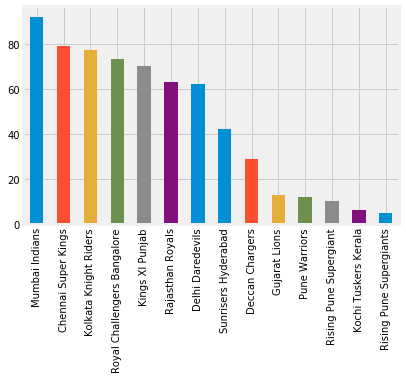

In [12]:
ipl_df['winner'].value_counts().plot.bar()

[Text(0,0,'Sunrisers Hyderabad'),
 Text(0,0,'Rising Pune Supergiant'),
 Text(0,0,'Kolkata Knight Riders'),
 Text(0,0,'Kings XI Punjab'),
 Text(0,0,'Royal Challengers Bangalore'),
 Text(0,0,'Mumbai Indians'),
 Text(0,0,'Delhi Daredevils'),
 Text(0,0,'Gujarat Lions'),
 Text(0,0,'Chennai Super Kings'),
 Text(0,0,'Rajasthan Royals'),
 Text(0,0,'Deccan Chargers'),
 Text(0,0,'Pune Warriors'),
 Text(0,0,'Kochi Tuskers Kerala'),
 Text(0,0,'nan')]

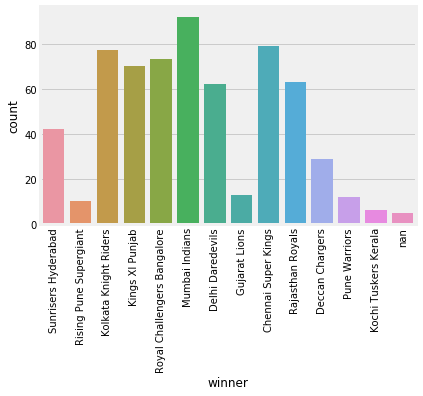

In [13]:
ax = sns.countplot(x="winner", data=ipl_df)
ax.set_xticklabels(labels = ipl_df["winner"].unique(),rotation=90)

In [14]:
print(((ipl_df['winner']).value_counts()).idxmax(),'Won most of the IPL Matches.')

('Mumbai Indians', 'Won most of the IPL Matches.')


In [17]:
# Toss decision
print('Toss Decisions in {}'.format((ipl_df['toss_decision']).value_counts()))

Toss Decisions in field    363
bat      273
Name: toss_decision, dtype: int64


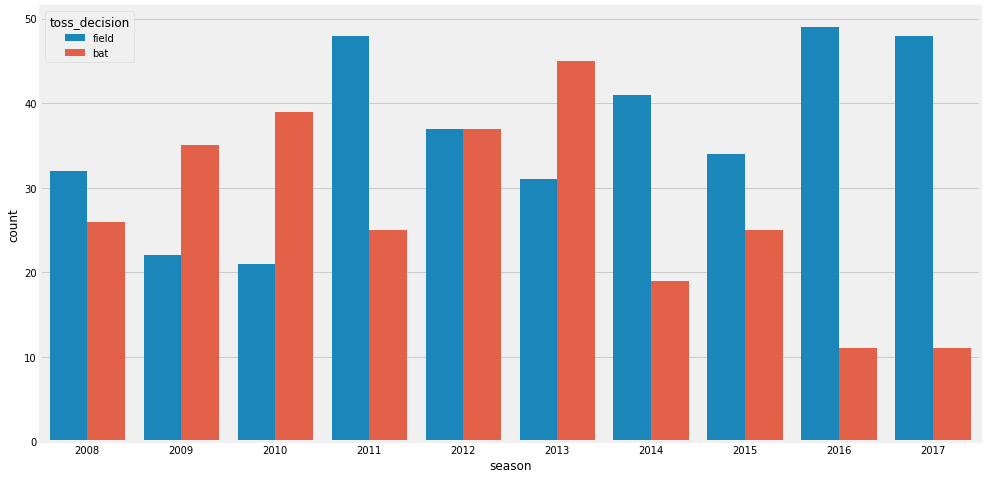

In [16]:
plt.subplots(figsize=(15,8))
sns.countplot(x='season',hue='toss_decision',data=ipl_df)
plt.show()